/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
(3900,)
(3900,)
(1672,)
(1672,)


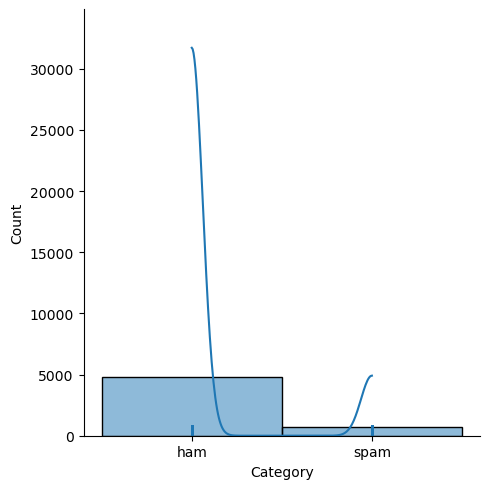

In [2]:

import numpy as np
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#read file from Kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        df = pd.read_csv(os.path.join(dirname, filename))
print(df.head())

x= df.Message #feature
y = df.Category #target
from sklearn.feature_extraction.text import TfidfVectorizer

#divide the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21, stratify=y)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

import seaborn as sb
#plot the graph
sb.displot(df['Category'], kde=True, rug=True)


# **Dataset Description and Model Predictions**

The dataset is a CSV file that contains spam and non-span text messages, I got the dataset from Kaggle named:spam-text-message-classification. The dataset consists of two columns, one is called Category which specifies whether the text is a "spam" or "ham", and the other column, Message, lists the texts. Thus, I expect from the model to predict spam messages, as I will be using the Category column as my target column and the Message column as my feature column. I'll train part of the dataset and test it and my model on the rest of the dataset.

In [2]:
#NB

import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#read file and create df
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        df = pd.read_csv(os.path.join(dirname, filename), header=0, encoding='latin-1')

print(df.head())   

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
# remove stop words
stopwords = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=stopwords)

# set up X and y
X = df.Message
y = df.Category
X.head()

y[:10]
#divide the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

X_train.shape

#vectorizer the data
X_train = vectorizer.fit_transform(X_train) 
X_test = vectorizer.transform(X_test)       

#visuals:
print('train size:', X_train.shape)
print(X_train.toarray()[:5])

print('\ntest size:', X_test.shape)
print(X_test.toarray()[:5])

from sklearn.naive_bayes import MultinomialNB
#apply the NB method
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

import math

prior_p = sum(y_train == 'spam')/len(y_train)

print('prior spam:', prior_p, 'log of prior:', math.log(prior_p))

naive_bayes.class_log_prior_[1] # this result is similar to the log result above


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#get prediction value
pred = naive_bayes.predict(X_test)

# the matrix is in this form:
#     tp   fp
#     fn   tn
print(confusion_matrix(y_test, pred))


# get the scores 
print('accuracy score: ', accuracy_score(y_test, pred))
      
print('\nprecision score (not spam): ', precision_score(y_test, pred, pos_label='ham'))
print('precision score (spam): ', precision_score(y_test, pred ,pos_label='spam'))

print('\nrecall score: (not spam)', recall_score(y_test, pred, pos_label='ham'))
print('recall score: (spam)', recall_score(y_test, pred, pos_label='spam'))
      
print('\nf1 score: ', f1_score(y_test, pred, pos_label='spam'))

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))
#check accuracy 
print('spam size in test data:',y_test[y_test=='ham'].shape[0])
print('test size: ', len(y_test))
baseline = y_test[y_test=='ham'].shape[0] / y_test.shape[0] 
print(baseline)

/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv
rows and columns: (5572, 2)
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
train size: (4457, 7565)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

test size: (1115, 7565)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.      

In [5]:
#LG
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

#read file and create df
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        df = pd.read_csv(os.path.join(dirname, filename))
print(df.head())

X= df.Message #feature
y = df.Category #target


# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

#transform the data and fit the train data
vectorizer = TfidfVectorizer(binary=True)
X_train = vectorizer.fit_transform(X_train)  
X_test = vectorizer.transform(X_test)       

#apply the logReg function
classifier = LogisticRegression(solver='lbfgs', class_weight='balanced')
classifier.fit(X_train, y_train)

#get prediction value
pred = classifier.predict(X_test)
# get score results from prediction value
print('accuracy score: ', accuracy_score(y_test, pred))
print('\nprecision score (not spam): ', precision_score(y_test, pred, pos_label='ham'))
print('precision score (spam): ', precision_score(y_test, pred ,pos_label='spam'))

print('\nrecall score: (not spam)', recall_score(y_test, pred, pos_label='ham'))
print('recall score: (spam)', recall_score(y_test, pred, pos_label='spam'))
      
print('\nf1 score: ', f1_score(y_test, pred, pos_label='spam'))

probs = classifier.predict_proba(X_test)
print('log loss: ', log_loss(y_test, probs))
#accuracy 
print('spam size in test data:',y_test[y_test=='ham'].shape[0])
print('test size: ', len(y_test))
baseline = y_test[y_test=='ham'].shape[0] / y_test.shape[0] 
print(baseline)

/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
accuracy score:  0.9811659192825112

precision score (not spam):  0.9916405433646813
precision score (spam):  0.9177215189873418

recall score: (not spam) 0.9864864864864865
recall score: (spam) 0.9477124183006536

f1 score:  0.932475884244373
log loss:  0.14684976141580813
spam size in test data: 962
test size:  1115
0.862780269058296


In [1]:
#NN

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#read file and create df
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        df = pd.read_csv(os.path.join(dirname, filename), header=0, encoding='latin-1')
print(df.head())


from nltk.corpus import stopwords

#remove stop words
stopwords = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=stopwords, binary=True)

# vectorizer the feature col and transform and fit the col
X= vectorizer.fit_transform(df.Message) #feature
y = df.Category #target

#split to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

from sklearn.neural_network import MLPClassifier

#apply the NN method and use (14, 2) as the size of my hidden value 
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(14, 2), random_state=1)
# fit the classifier
classifier.fit(X_train, y_train)

#get the prediction value 
pred = classifier.predict(X_test)

#get the results from the prediction 
print('accuracy score: ', accuracy_score(y_test, pred))
print('\nprecision score (not spam): ', precision_score(y_test, pred, pos_label='ham'))
print('precision score (spam): ', precision_score(y_test, pred ,pos_label='spam'))

print('\nrecall score: (not spam)', recall_score(y_test, pred, pos_label='ham'))
print('recall score: (spam)', recall_score(y_test, pred, pos_label='spam'))
print('\nf1 score: ', f1_score(y_test, pred, pos_label='spam'))
#accuracy
print('spam size in test data:',y_test[y_test=='ham'].shape[0])
print('test size: ', len(y_test))
baseline = y_test[y_test=='ham'].shape[0] / y_test.shape[0] 
print(baseline)

/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
accuracy score:  0.9865470852017937

precision score (not spam):  0.9856410256410256
precision score (spam):  0.9928571428571429

recall score: (not spam) 0.998960498960499
recall score: (spam) 0.9084967320261438

f1 score:  0.9488054607508533
spam size in test data: 962
test size:  1115
0.862780269058296


# **Performance Analysis** 

for this assignment I used three supervised Machine Learning algorithms to train and test my model to make predictions and classifications,Naive Bayes, Logistic Regression, and Neural Network methods. 

**The Naive Bayes function:**

I can test the accuracy of my result by running the following code:

print('spam size in test data:',y_test[y_test=='ham'].shape[0])
print('test size: ', len(y_test))
baseline = y_test[y_test=='ham'].shape[0] / y_test.shape[0] 
print(baseline)

which gave me this result:

spam size in test data: 962
test size:  1115
0.862780269058296

So, the size of the test data was 1115 and 962 of them were spam messages. Hence the accuracy of my is 86% which also means that my model is accurate (the model was able to learn from the train data and the result of the test data was 86% correct), however, it did miss a couple of spam messages. 

Also, I got these results from the accuracy, recall, and precision methods:

accuracy score:  0.9650224215246637

precision score (not spam):  0.961038961038961
precision score (spam):  1.0

recall score: (not spam) 1.0
recall score: (spam) 0.7450980392156863

f1 score:  0.8539325842696629

We can see that the accuracy and precision scores are very high (meaning that most of the model prediction about spam messages are true, however, some of the data might not really be spam messages) However, the recall score is low from spam messages are around 75% meaning 75% were actually spam messages (no false positive). 


**Logistic Regression method:**

The accuracy of my LogReg model was also 86% accurate. I got the following results after running the the accuracy, recall, log loss, and precision methods:

accuracy score:  0.9811659192825112

precision score (not spam):  0.9916405433646813
precision score (spam):  0.9177215189873418

recall score: (not spam) 0.9864864864864865
recall score: (spam) 0.9477124183006536

f1 score:  0.932475884244373
log loss:  0.14684976141580813

From what we can see from the results my accuracy, precision, and recall scores are all very high, which means the model has a very small number of false positive results. The log loss value is small which means that the model is accurate (as it ranges from 0 to 1) the closer it's to 0 the accurate my model is. 

**Neural Network method:**

The accuracy of my LogReg model was also 86% accurate. I got the following results after running the the accuracy, recall, and precision methods:

accuracy score:  0.9865470852017937

precision score (not spam):  0.9856410256410256
precision score (spam):  0.9928571428571429

recall score: (not spam) 0.998960498960499
recall score: (spam) 0.9084967320261438

f1 score:  0.9488054607508533

My Neural Network method has a (14, 2) hidden layers, which is a good number (doesn't overfit or underfit the results). Hence, the scores I received for my NN model are very high, which means my model is accurate according to the scores